# K-Means Clustering for Emission Calculations/Classifications

In modern radio astronomy (like with the VLA Sky Survey or the upcoming SKA), we detect millions of sources. We cannot manually classify each one as "Quasar" or "Gas Cloud." We need AI to look at the data and group similar objects together automatically. We will perform some blind source classification.

**Objective**: We will generate a synthetic "catalog" of radio sources containing three types of objects mixed together:
1. HII Regions: Extended size, thermal (flat) spectrum.
2. Supernova Remnants (SNRs): Extended size, steep non-thermal spectrum.
3. Active Galactic Nuclei (AGN): Point-like (tiny) size, steep spectrum.

**Challenge**: The AI (K-Means) is not told what these objects are. It only sees the raw numbers (Flux, Size, Spectral Index). Can it successfully "rediscover" these three distinct classes of physics just by looking at the data structure?

The Code
We will use `sklearn.cluster.KMeans` to find patterns in our multi-dimensional data.

In [1]:
# 0. Import libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# 1. Generate Synthetic Survey Catalog
# We will simulate 300 sources: 100 of each type.
np.random.seed(42)
n_samples = 100

# Type 1: HII Regions (Thermal)
# Size: Large (10 to 100 arcsec)
# Spectral Index: Flat (-0.1 +/- 0.1)
# Brightness: Moderate
hii_size = np.random.uniform(10, 100, n_samples)
hii_index = np.random.normal(-0.1, 0.1, n_samples)
hii_flux = np.random.uniform(0.1, 2.0, n_samples) # Janskys

# Type 2: Supernova Remnants (Non-Thermal Extended)
# Size: Large (10 to 100 arcsec)
# Spectral Index: Steep (-0.7 +/- 0.1)
# Brightness: Bright
snr_size = np.random.uniform(10, 100, n_samples)
snr_index = np.random.normal(-0.7, 0.1, n_samples)
snr_flux = np.random.uniform(1.0, 10.0, n_samples) 

# Type 3: AGN / Quasars (Non-Thermal Compact)
# Size: Tiny (Point source, < 1 arcsec)
# Spectral Index: Steep (-0.7 +/- 0.1)
# Brightness: Variable (often faint to bright)
agn_size = np.random.uniform(0.1, 1.0, n_samples) # Very small!
agn_index = np.random.normal(-0.7, 0.1, n_samples)
agn_flux = np.random.uniform(0.01, 5.0, n_samples)

In [3]:
# Combine into a single "Catalog"
# Features: [Log(Size), Spectral Index, Log(Flux)]
# We use Log because sizes and fluxes span orders of magnitude (Power Laws)
X_hii = np.column_stack((np.log10(hii_size), hii_index, np.log10(hii_flux)))
X_snr = np.column_stack((np.log10(snr_size), snr_index, np.log10(snr_flux)))
X_agn = np.column_stack((np.log10(agn_size), agn_index, np.log10(agn_flux)))

X_catalog = np.vstack((X_hii, X_snr, X_agn))

In [4]:
# 2. The AI Model (Unsupervised Clustering) 

# Data Scaling is crucial for K-Means because it calculates "distances"
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_catalog)

# We ask the AI to find 3 clusters (since we suspect 3 physics types)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Get the labels the AI assigned (0, 1, or 2)
labels = kmeans.labels_

D:\zz - Rizchel\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


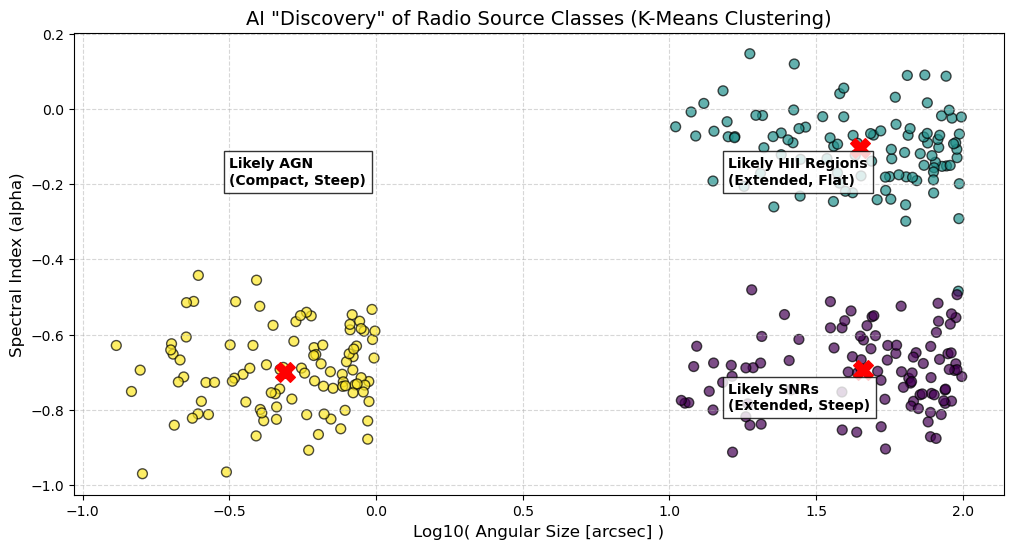

In [5]:
# 3. Visualization

# We will plot Size vs. Spectral Index, colored by what the AI "thinks" the groups are.

plt.figure(figsize=(12, 6))

# Plot the clusters found by AI
# Note: We index columns 0 (Log Size) and 1 (Spectral Index) for the X and Y axes
scatter = plt.scatter(X_catalog[:, 0], X_catalog[:, 1], c=labels, cmap='viridis', 
                      s=50, alpha=0.7, edgecolors='k')

# Add centroids (the "average" of each cluster found by the AI)
# We have to inverse_transform them to get back to real units
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Cluster Centroids')

# Formatting
plt.xlabel('Log10( Angular Size [arcsec] )', fontsize=12)
plt.ylabel('Spectral Index (alpha)', fontsize=12)
plt.title('AI "Discovery" of Radio Source Classes (K-Means Clustering)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)

# Add custom legend to explain the physics
# (In a real blind survey, we would analyze the centroids to figure out what they are)
plt.text(-0.5, -0.2, "Likely AGN\n(Compact, Steep)", color='black', fontweight='bold', 
         bbox=dict(facecolor='white', alpha=0.8))
plt.text(1.2, -0.2, "Likely HII Regions\n(Extended, Flat)", color='black', fontweight='bold', 
         bbox=dict(facecolor='white', alpha=0.8))
plt.text(1.2, -0.8, "Likely SNRs\n(Extended, Steep)", color='black', fontweight='bold', 
         bbox=dict(facecolor='white', alpha=0.8))

plt.show()